In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set(style="whitegrid")

In [10]:
df= pd.read_csv(r"D:\AI\008_NED_Machine_Learning\data\017-Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           213 non-null    float64
 3   ssc_b           213 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           208 non-null    object 
 7   degree_p        208 non-null    float64
 8   degree_t        208 non-null    object 
 9   workex          208 non-null    object 
 10  etest_p         213 non-null    float64
 11  specialisation  213 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,213.000000,215.000000,208.000000,213.000000,215.000000,148.000000
mean,108.000000,67.409531,66.333163,66.269663,72.110892,62.278186,288655.405405
std,62.209324,10.815114,10.897509,7.176998,13.309323,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,61.000000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,76.000000,73.000000,72.000000,84.000000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,85.000000,98.000000,77.890000,940000.000000


In [6]:
print("Dataset Shape:", df.shape)

Dataset Shape: (215, 15)


In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              2
ssc_b              2
hsc_p              0
hsc_b              0
hsc_s              7
degree_p           7
degree_t           7
workex             7
etest_p            2
specialisation     2
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
sl_no              0
gender             0
ssc_p              2
ssc_b              2
hsc_p              0
hsc_b              0
hsc_s              7
degree_p           7
degree_t           7
workex             7
etest_p            2
specialisation     2
mba_p              0
status             0
salary            67
dtype: int64


In [13]:
df_placed = df[df['status'] == 'Placed'].copy()

df_placed.drop(columns=['status'], inplace=True)

df_placed.dropna(inplace=True)

print("After cleaning, missing values:\n", df_placed.isnull().sum())

After cleaning, missing values:
 sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


In [14]:
cat_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
num_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [15]:
X = df_placed.drop(columns=['salary', 'sl_no'])  
y = df_placed['salary']

ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(drop='first', sparse_output=False), cat_cols)],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded, columns=ct.get_feature_names_out())

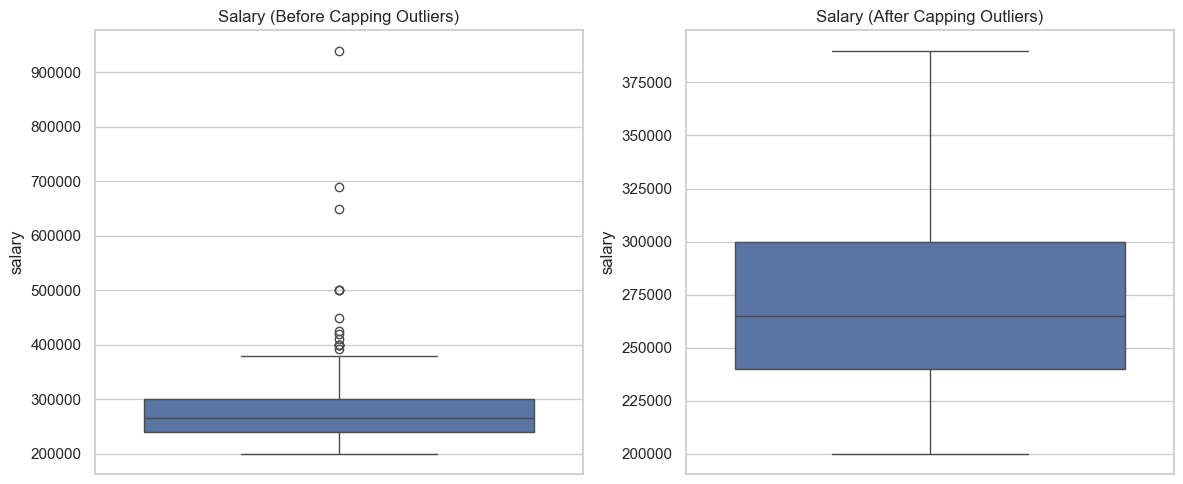

In [16]:
def cap_outliers(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return series.clip(lower=lower, upper=upper)

y_capped = cap_outliers(y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=y, ax=ax[0])
ax[0].set_title("Salary (Before Capping Outliers)")
sns.boxplot(y=y_capped, ax=ax[1])
ax[1].set_title("Salary (After Capping Outliers)")
plt.tight_layout()
plt.show()

In [18]:
eda_df = X_encoded_df.copy()
eda_df['salary'] = y_capped.values

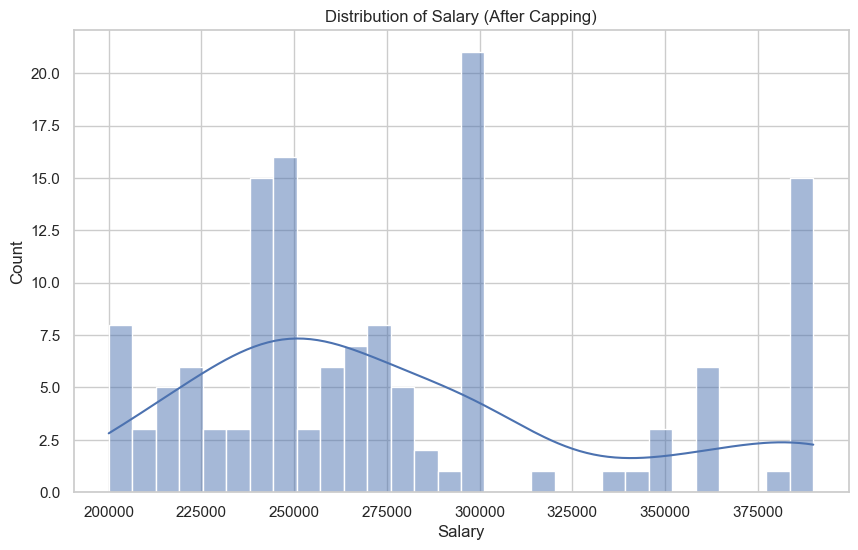

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(y_capped, bins=30, kde=True)
plt.title("Distribution of Salary (After Capping)")
plt.xlabel("Salary")
plt.show()

Top 10 features correlated with salary:
remainder__etest_p               0.255172
remainder__mba_p                 0.241002
onehot__degree_t_Sci&Tech        0.230931
onehot__gender_M                 0.206184
remainder__ssc_p                 0.153897
onehot__specialisation_Mkt&HR   -0.134159
onehot__ssc_b_Others             0.115692
remainder__hsc_p                 0.103858
onehot__hsc_s_Science            0.077630
onehot__workex_Yes               0.075281
Name: salary, dtype: float64


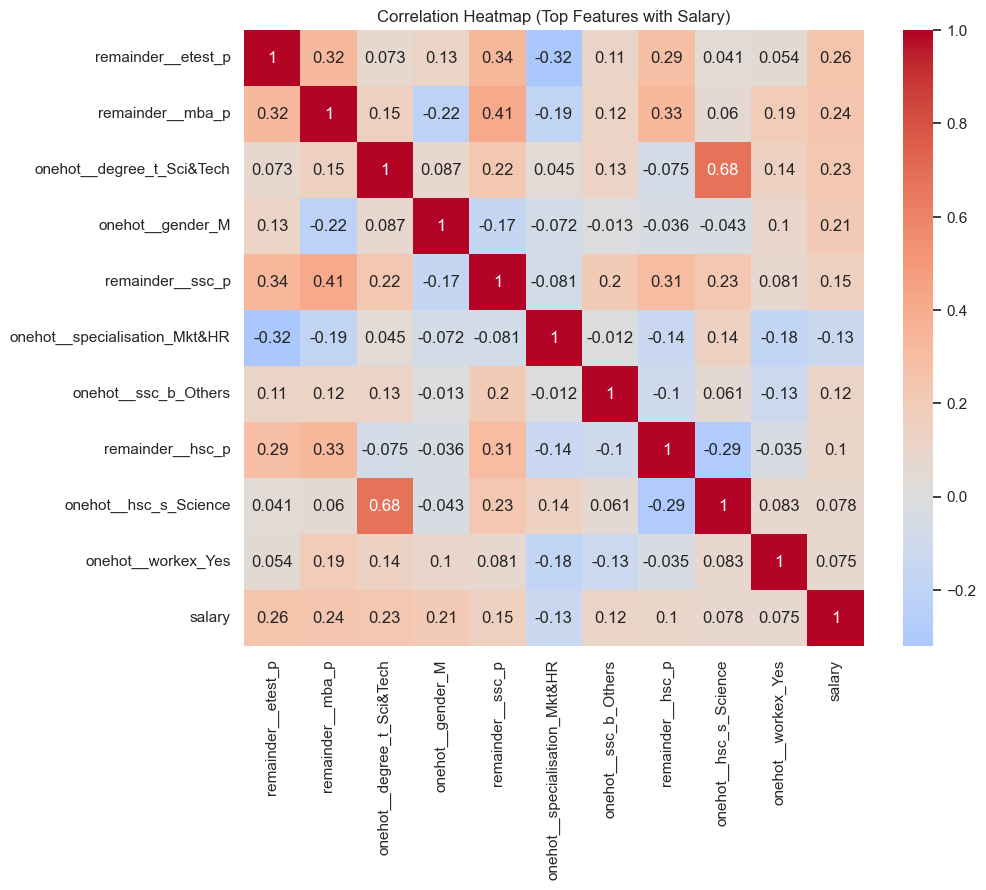

In [20]:
corr_matrix = eda_df.corr()
salary_corr = corr_matrix['salary'].sort_values(key=abs, ascending=False)

print("Top 10 features correlated with salary:")
print(salary_corr.iloc[1:11])  

top_features = salary_corr.iloc[1:11].index.tolist()
top_corr = eda_df[top_features + ['salary']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Top Features with Salary)")
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y_capped, test_size=0.2, random_state=42, shuffle=True
)

In [24]:
preprocessor = StandardScaler()

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE:  {mae:,.2f}")
print(f"MSE:  {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

Model Performance:
MAE:  45,049.66
MSE:  3,217,327,306.21
RMSE: 56,721.49
R²:   -0.0664
